In [19]:
from IPython.display import Image
import cv2
import numpy as np

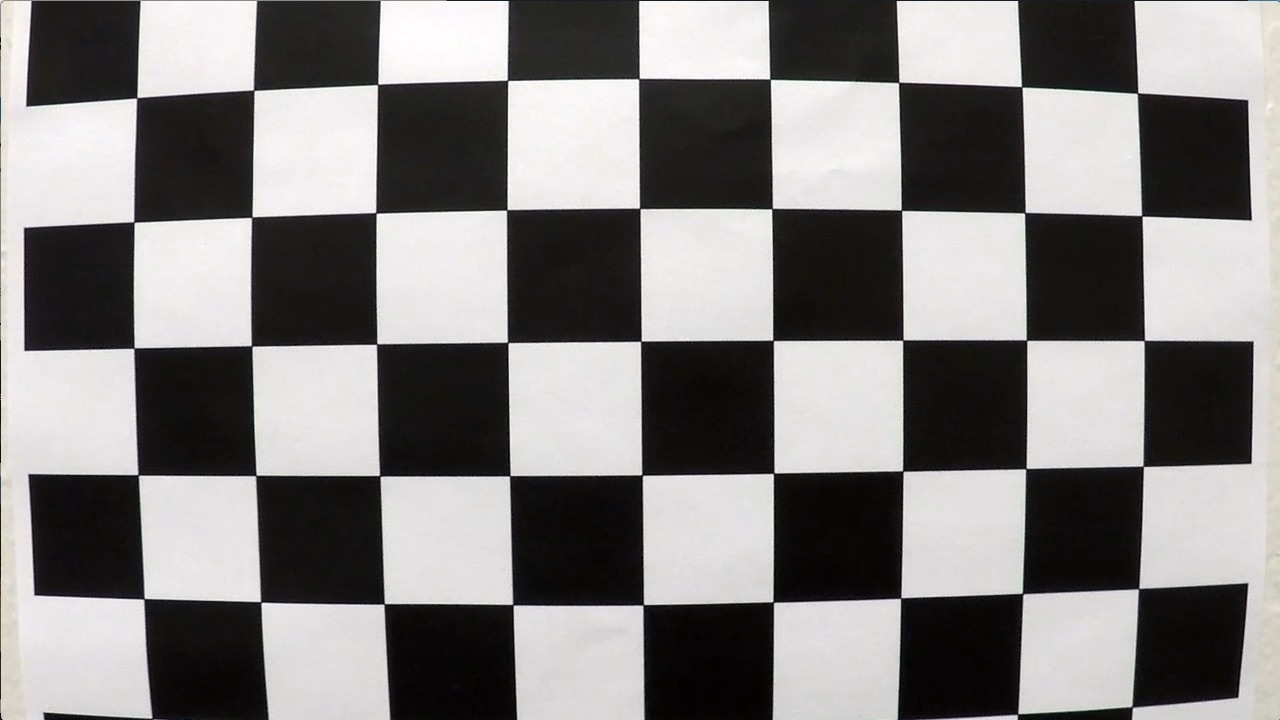

In [13]:
fname='camera_cal/calibration1.jpg'
Image(filename=fname) 

 camera_cal	       harder_challenge_video.mp4   set_git.sh
 challenge_video.mp4   LICENSE			    Solution.ipynb
'#.envrc#'	       output_images		    test_images
 examples	       project_video.mp4	    venv
 example_writeup.pdf   README.md		    writeup_template.md


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

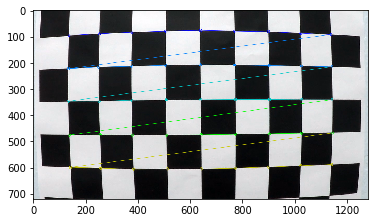

In [18]:

img = cv2.imread(fname)

nx = 9
ny = 5

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
found, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if found == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, found)
    plt.imshow(img)


In [41]:
objp = np.zeros((nx * ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx,0:ny].transpose().reshape(-1,2)
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [8., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [8., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [8., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [8., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [8., 4., 0.]], dtype=float32)

In [42]:
imgpoints = [corners]
objpoints = [objp]

In [43]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints,
    imgpoints,
    gray.shape[::-1],
    None,
    None
)

In [ ]:
test_image = cv2.imread(fname)

In [44]:
undistorted = cv2.undistort(
    img,
    mtx,
    dist,
    None,
    mtx
)

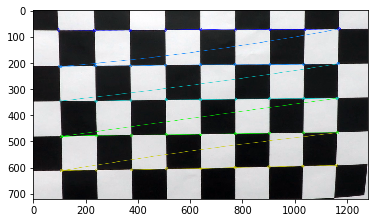

In [45]:
plt.imshow(undistorted)